In [1]:
# import libs
import requests
import json
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


# define paths
API_key_path = "API keys/salling_bearer.txt"


In [2]:
# get credentials
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

API_key = get_file_contents(API_key_path)

In [3]:
# define zip codes
zipcodedf = pd.read_csv("data/zipcodes.csv")

In [4]:
zipcodedf.head()

,Postal Code,City
0,555,Scanning
1,800,Høje Taastrup
2,877,Valby
3,899,Kommuneservice
4,900,København C


In [5]:
uniqueZipCodes = zipcodedf['Postal Code'].unique()

for i, zipcode in enumerate(uniqueZipCodes):
    endpoint_url = f"https://api.sallinggroup.com/v1/food-waste?zip={zipcode}"

    # Set your API key or access token as a header
    headers = {"Authorization": f"Bearer {API_key}"}
    # Make the HTTP GET request to the API endpoint
    response = requests.get(endpoint_url, headers=headers)
    
    if response.status_code == 200:
        # Parse the response content as JSON
        data = response.json()
        print(response.status_code)
        # Extract the relevant data from the JSON object
        # and do something with it (e.g. print it out)
        print('Data Retrieval has been compeleted')
    else:
        print("Error: Failed to retrieve data from API")
    
    data = response.json()
    # create data frame structre
    if i == 0:
        df = pd.json_normalize(data, record_path=['clearances'], meta=['store', ['store', 'brand'], ['store', 'name'], ['store', 'id']])
    # iteratively join data frames for different zip codes
    else:
        try:
            df = pd.concat([df, pd.json_normalize(data, record_path=['clearances'], meta=['store', ['store', 'brand'], ['store', 'name'], ['store', 'id']])])
        except:
            pass
    
    time.sleep(2)


200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has been compeleted
200
Data Retrieval has be

In [6]:
# print first 5 rows
df.head()

,offer.currency,offer.discount,offer.ean,offer.endTime,offer.lastUpdate,offer.newPrice,offer.originalPrice,offer.percentDiscount,offer.startTime,offer.stock,offer.stockUnit,product.categories.da,product.categories.en,product.description,product.ean,product.image,store,store.brand,store.name,store.id
0,DKK,7.95,5712580187624,2023-03-28T21:59:59.000Z,2023-03-23T08:08:44.000Z,10.0,17.95,44.29,2023-03-23T08:08:23.000Z,1.0,each,Hytteost>Ost>Mejeri>Mejeri & køl>Classificatio...,Cottage Cheese>Cheese>Dairy>Dairy And Cold Sto...,"HYTTEOST 1,5% CHEASY",5700426160900,https://digitalassets.sallinggroup.com/image/u...,"{'address': {'city': 'København K', 'country':...",foetex,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e
1,DKK,8.95,5712580187631,2023-03-24T22:59:59.000Z,2023-03-23T08:20:47.000Z,14.0,22.95,39.00,2023-03-23T08:20:19.000Z,1.0,each,Kernerugbrød>Rugbrød>Brød & kager>Classificati...,Seeded Rye Breads>Rye Breads>Bread And Cakes>s...,ØKO KERNEGROV LEVEBRØD,5701205009274,https://digitalassets.sallinggroup.com/image/u...,"{'address': {'city': 'København K', 'country':...",foetex,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e
2,DKK,8.95,5712580187655,2023-03-24T22:59:59.000Z,2023-03-23T08:22:20.000Z,10.0,18.95,47.23,2023-03-23T08:21:59.000Z,4.0,each,Andre rugbrød>Rugbrød>Brød & kager>Classificat...,Other Rye Breads>Rye Breads>Bread And Cakes>si...,SLESVIGERBRØD SCHULSTAD,5701205175061,https://digitalassets.sallinggroup.com/image/u...,"{'address': {'city': 'København K', 'country':...",foetex,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e
3,DKK,19.95,5712580187662,2023-03-24T22:59:59.000Z,2023-03-23T08:22:57.000Z,12.0,31.95,62.44,2023-03-23T08:22:38.000Z,2.0,each,Toastbrød>Lyst & groft brød>Brød & kager>Class...,Toast Breads>Light Breads Dark Breads>Bread An...,KART. SANDWICH NYT NORDISK,5710405068172,https://digitalassets.sallinggroup.com/image/u...,"{'address': {'city': 'København K', 'country':...",foetex,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e
4,DKK,11.95,5712580187679,2023-03-24T22:59:59.000Z,2023-03-23T08:23:22.000Z,16.0,27.95,42.75,2023-03-23T08:22:56.000Z,3.0,each,Toastbrød>Lyst & groft brød>Brød & kager>Class...,Toast Breads>Light Breads Dark Breads>Bread An...,MULTIKER.SANDW LEVEBRØD,5701205005542,https://digitalassets.sallinggroup.com/image/u...,"{'address': {'city': 'København K', 'country':...",foetex,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e


In [7]:
df.describe()

,offer.discount,offer.newPrice,offer.originalPrice,offer.percentDiscount,offer.stock
count,10419.000000,10419.000000,10419.000000,10419.000000,10419.000000
mean,11.268397,18.021480,29.289877,38.569854,34.363465
std,9.227790,15.567849,22.141179,14.000105,241.327685
min,0.300000,1.000000,3.000000,3.000000,1.000000
25%,5.015000,10.000000,17.480000,25.930000,1.000000
50%,8.950000,14.000000,23.950000,37.300000,3.000000
75%,13.950000,22.000000,35.000000,47.710000,8.000000
max,149.000000,449.000000,499.000000,88.200000,9999.000000


In [8]:
# clean product categories
df['product.categories.en'] = df['product.categories.en'].str.replace('>sification 1 root>umer Faced Hierarchy','')
new = df["product.categories.en"].str.split(">", n = 6, expand = True)

for i in np.arange(0,6,1):
    df[f'product.category.en.level{i}'] = new[i]

In [9]:
# add year, month, weekday and hour for each timestamp
df['offer.endTime']  = pd.to_datetime(df['offer.endTime']).dt.tz_convert('Europe/Berlin')
df['offer.startTime'] = pd.to_datetime(df['offer.startTime']).dt.tz_convert('Europe/Berlin')
df['offer.lastUpdate'] = pd.to_datetime(df['offer.lastUpdate']).dt.tz_convert('Europe/Berlin')

df['offer.endTime.hour'] = df['offer.endTime'].dt.hour
df['offer.endTime.weekday'] = df['offer.endTime'].dt.weekday
df['offer.endTime.month'] = df['offer.endTime'].dt.month
df['offer.endTime.year'] = df['offer.endTime'].dt.year

df['offer.startTime.hour'] = df['offer.startTime'].dt.hour
df['offer.startTime.weekday'] = df['offer.startTime'].dt.weekday
df['offer.startTime.month'] = df['offer.startTime'].dt.month
df['offer.startTime.year'] = df['offer.startTime'].dt.year

df['offer.lastUpdate.hour'] = df['offer.lastUpdate'].dt.hour
df['offer.lastUpdate.weekday'] = df['offer.lastUpdate'].dt.weekday
df['offer.lastUpdate.month'] = df['offer.lastUpdate'].dt.month
df['offer.lastUpdate.year'] = df['offer.lastUpdate'].dt.year


In [10]:
# save data
#df.to_csv('data/data.csv')

<AxesSubplot: title={'center': 'Number of Offers per Level 0 Product Category'}, xlabel='Product Category L0', ylabel='Number Of Offers'>

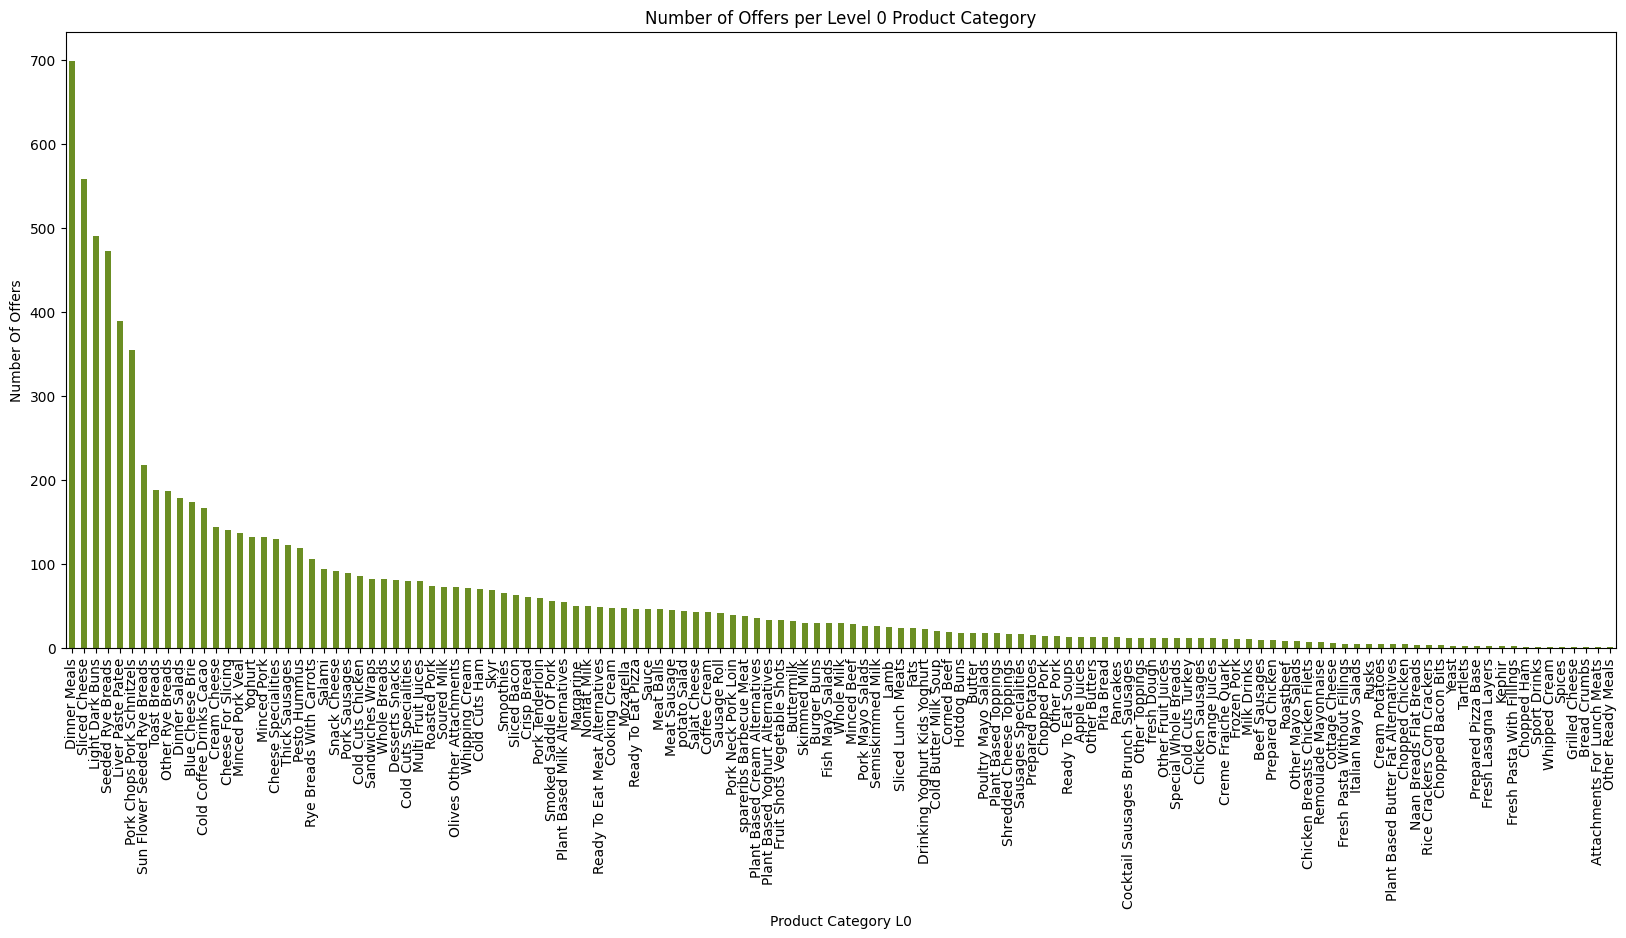

In [11]:
# visualise data
# start offer

df_offersPerCategoryL0 = df[['offer.startTime','product.category.en.level0']].groupby('product.category.en.level0').count()
df_offersPerCategoryL0 = df_offersPerCategoryL0.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerCategoryL0 = df_offersPerCategoryL0.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerCategoryL0.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='Product Category L0', title='Number of Offers per Level 0 Product Category',color='olivedrab')


#offer_category_weekday = pd.pivot_table(df, values='offer.ean', index='offer.startTime.weekday',columns='product.category.en.level0',aggfunc='count')
#offer_category_weekday

In [12]:
# implement NLP to generate better classifications/categories for the products
from sklearn.feature_extraction import _stop_words
import string
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from adjustText import adjust_text
from sklearn.decomposition import PCA


lemmatizer = WordNetLemmatizer()

# pre process words
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in _stop_words.ENGLISH_STOP_WORDS])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

# define unique level 0 categories
L0categories = df['product.category.en.level0'].unique()
# remove 'nan'
L0categories = [x for x in L0categories if str(x) != 'nan']

cleanL0categories = np.empty(np.shape(L0categories)[0],dtype=str)
for i, text in enumerate(L0categories):
    cleanL0categories[i] = (text_processing(text))

# We need to embed sentences into vectors 
# define unique level 0 categories
# define model
model = SentenceTransformer('all-MiniLM-L6-v2') #https://www.sbert.net/
# vectorize each categary
vectorembeddings = model.encode(L0categories)


c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


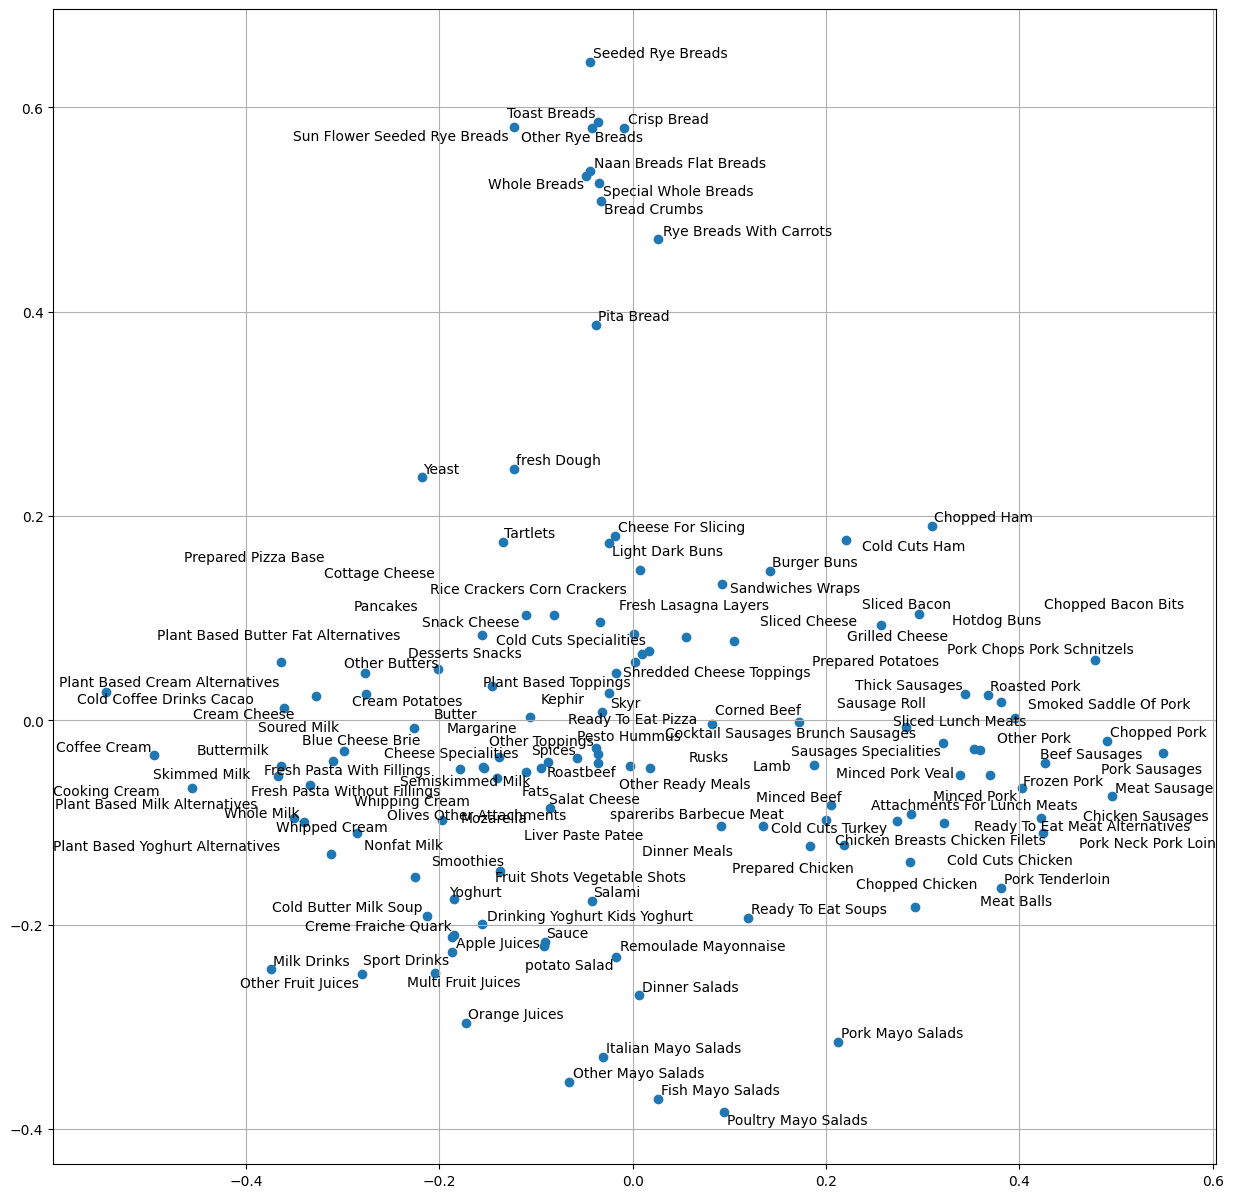

In [13]:
# PCA decomp. Exploratory analysis
# 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(np.array(vectorembeddings))

plt.figure(figsize=(15,15))
plt.scatter(vectors_2d.T[0], vectors_2d.T[1])

texts = [plt.text(vectors_2d.T[0,i], vectors_2d.T[1,i], L0categories[i]) for i in range(len(L0categories))]
adjust_text(texts, fontsize=5)          
plt.grid()
plt.show()



In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(np.array(vectorembeddings))
labels = kmeans.labels_

clusteringresults = pd.DataFrame({'L0Categories' : L0categories,'Label': labels})

for i in clusteringresults['Label'].unique():
    print(f"Label {i}")
    print(clusteringresults[clusteringresults['Label']==i]['L0Categories'].unique())


Label 0
['Cottage Cheese' 'Seeded Rye Breads' 'Other Rye Breads' 'Toast Breads'
 'Light Dark Buns' 'Blue Cheese Brie' 'Semiskimmed Milk' 'Sliced Cheese'
 'Fats' 'Cheese For Slicing' 'Liver Paste Patee' 'Whipping Cream'
 'Sun Flower Seeded Rye Breads' 'Margarine'
 'Plant Based Cream Alternatives' 'Burger Buns' 'Whole Milk'
 'Skimmed Milk' 'Hotdog Buns' 'Snack Cheese' 'Cream Cheese' 'Pesto Hummus'
 'Buttermilk' 'Nonfat Milk' 'Pancakes' 'Coffee Cream'
 'Rye Breads With Carrots' 'Mozarella' 'Special Whole Breads'
 'Cooking Cream' 'Plant Based Milk Alternatives' 'Whole Breads'
 'Soured Milk' 'Cheese Specialities' 'Salat Cheese' 'Other Butters'
 'Rusks' 'Desserts Snacks' 'Naan Breads Flat Breads' 'Roastbeef' 'Butter'
 'Yeast' 'Crisp Bread' 'Skyr' 'Tartlets' 'Cold Butter Milk Soup'
 'Bread Crumbs' 'Whipped Cream' 'Kephir' 'fresh Dough' 'Pita Bread'
 'Cream Potatoes' 'Plant Based Butter Fat Alternatives'
 'Rice Crackers Corn Crackers' 'Grilled Cheese']
Label 2
['Dinner Meals' 'Dinner Salads' '